In [46]:

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score





In [47]:
Stock_keeping_Data = pd.read_csv("Sku_Data.csv")

Stock_keeping_Data

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
0,1,0.058,547,9,2441.0,105.60,1.56,1920
1,2,0.954,547,0,0.0,207.68,1.00,384
2,3,2.385,547,12,23.0,165.78,1.02,108
3,4,5.100,547,0,0.0,221.04,1.05,72
4,5,0.000,547,0,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...
2274,2275,0.000,0,0,0.0,2.70,0.00,10
2275,2276,0.000,0,1,1.0,9.58,0.00,1
2276,2277,0.000,0,0,0.0,38.36,0.00,4
2277,2278,0.000,0,1,1.0,25.11,0.00,3


In [48]:

#Displaying first few rows of the dataset
display(Stock_keeping_Data.head())

# Basic information about the dataset
print(Stock_keeping_Data.info())
print(Stock_keeping_Data.describe())

# Checking for duplicated and missing values
print("Duplicated rows:", Stock_keeping_Data.duplicated().sum())
print("Missing values:\n", Stock_keeping_Data.isnull().sum())

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
0,1,0.058,547,9,2441.0,105.60,1.56,1920
1,2,0.954,547,0,0.0,207.68,1.00,384
2,3,2.385,547,12,23.0,165.78,1.02,108
3,4,5.100,547,0,0.0,221.04,1.05,72
4,5,0.000,547,0,0.0,0.00,0.00,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2279 non-null   int64  
 1   Unitprice        2279 non-null   float64
 2   Expire date      2279 non-null   int64  
 3   Outbound number  2279 non-null   int64  
 4   Total outbound   2279 non-null   float64
 5   Pal grossweight  2279 non-null   float64
 6   Pal height       2279 non-null   float64
 7   Units per pal    2279 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 142.6 KB
None
                ID    Unitprice  Expire date  Outbound number  Total outbound  \
count  2279.000000  2279.000000  2279.000000      2279.000000     2279.000000   
mean   1140.000000     4.269402   410.371654       235.976305      731.701053   
std     658.034953    14.449000   240.875419       700.230685     2146.029848   
min       1.000000     0.000000     0.000000         

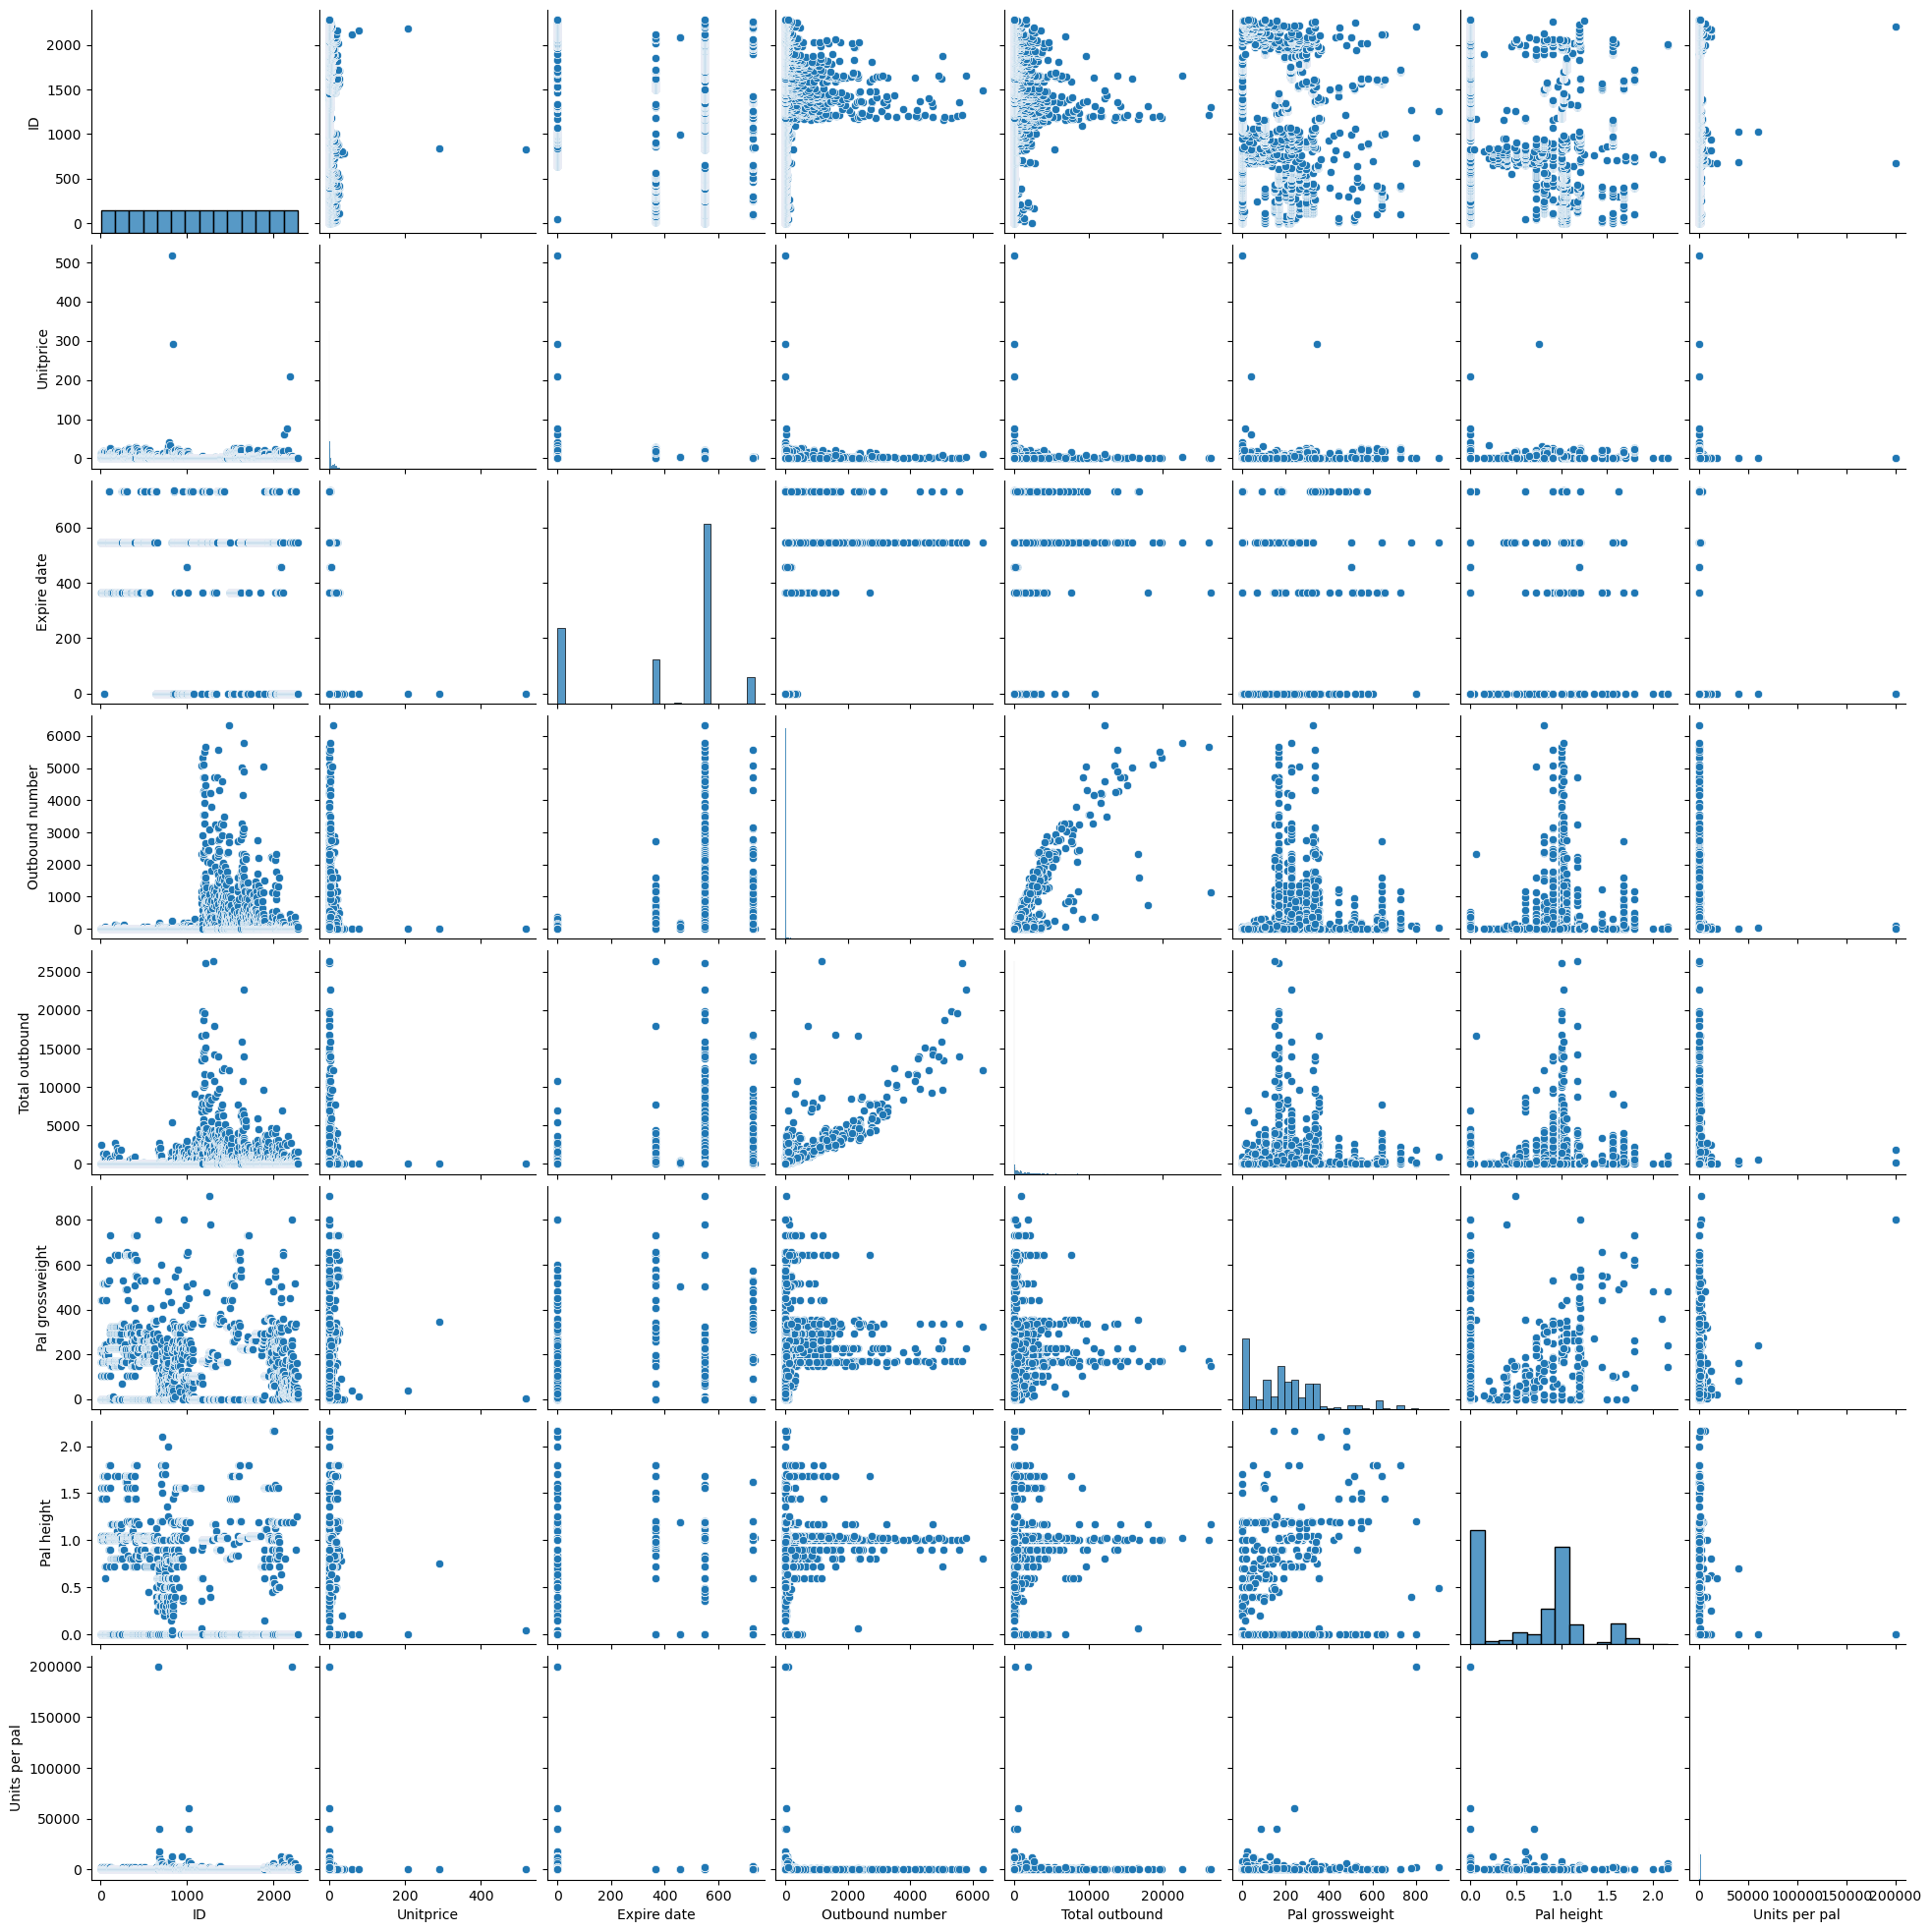

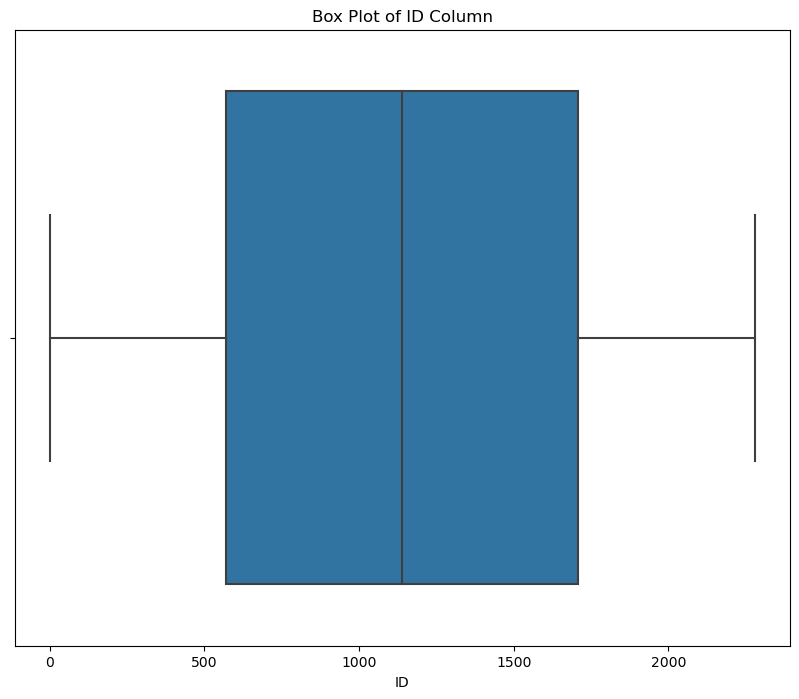

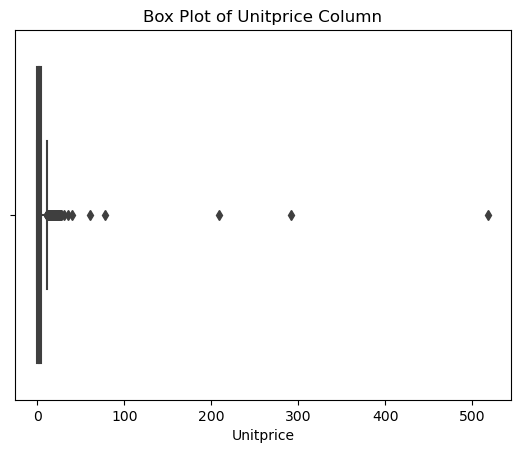

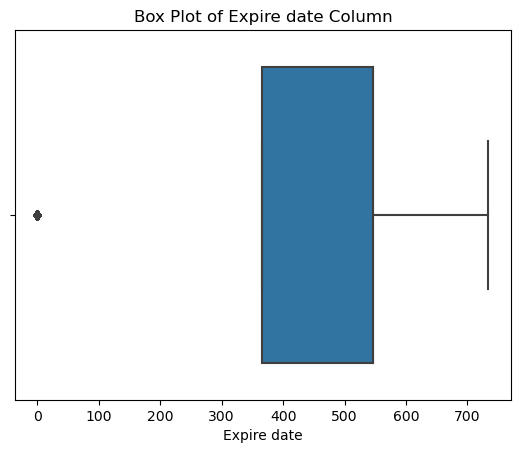

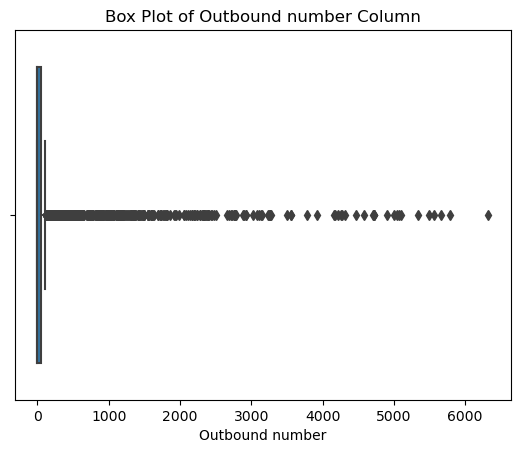

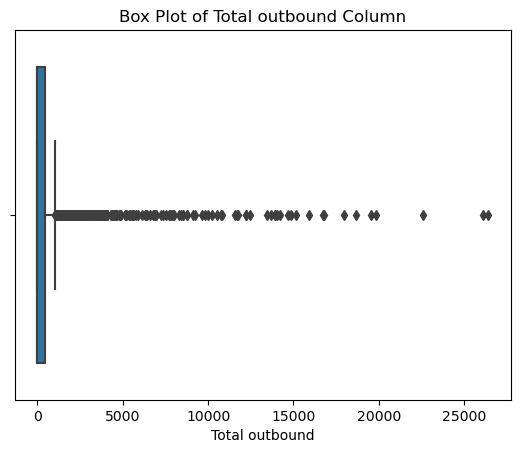

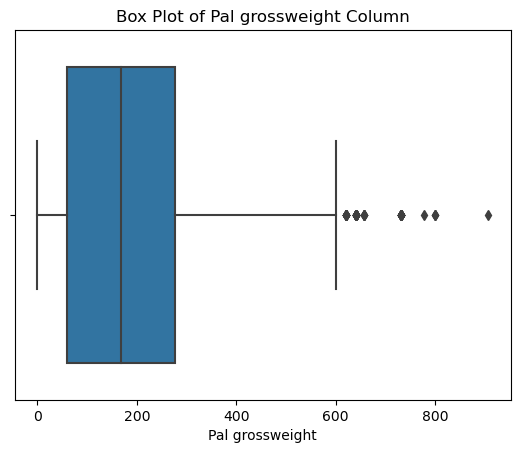

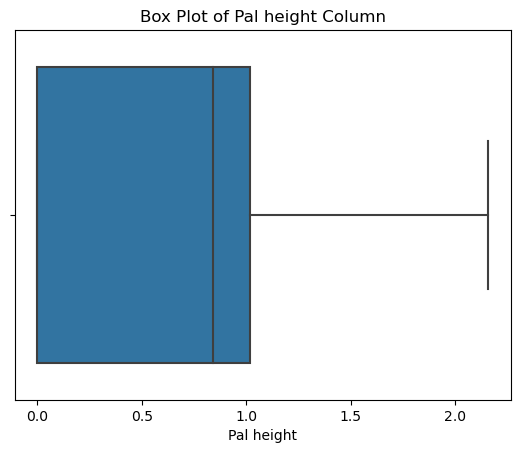

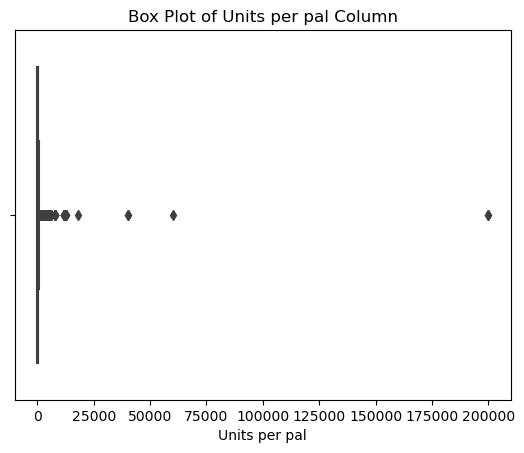

In [49]:
# Exploratory Data Analysis (EDA)
# Pairplot to visualize relationships
sns.pairplot(Stock_keeping_Data)

# Boxplots for each feature
plt.figure(figsize=(10, 8))
for column in Stock_keeping_Data.columns:
    sns.boxplot(x=column, data=Stock_keeping_Data)
    plt.xlabel(column)
    plt.title(f'Box Plot of {column} Column')
    plt.show()


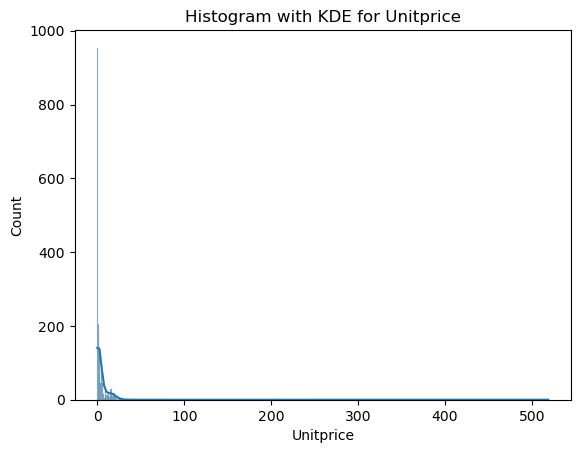

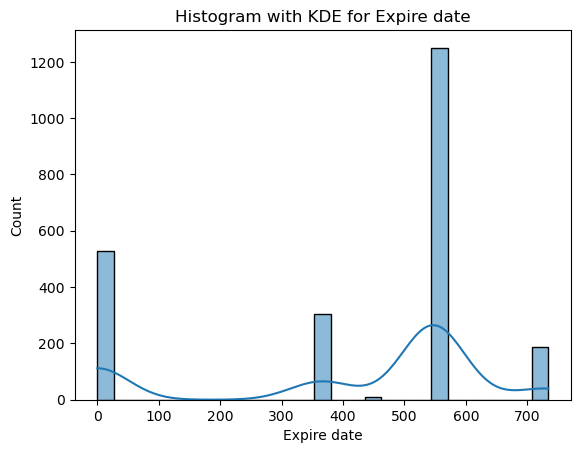

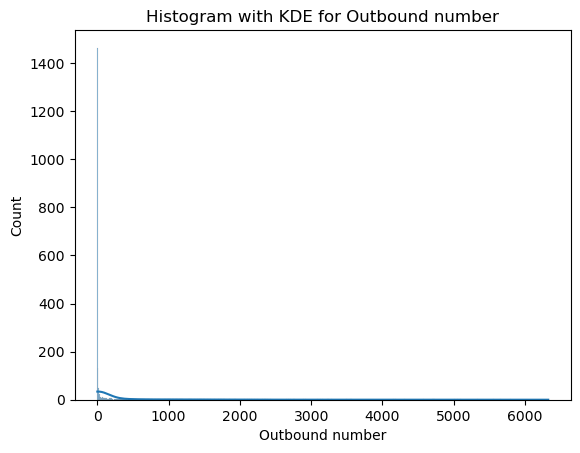

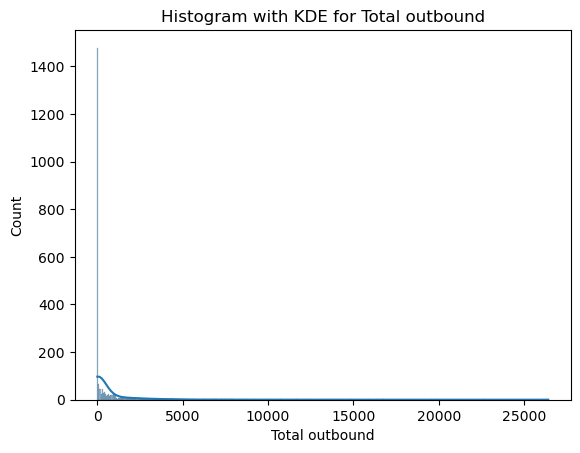

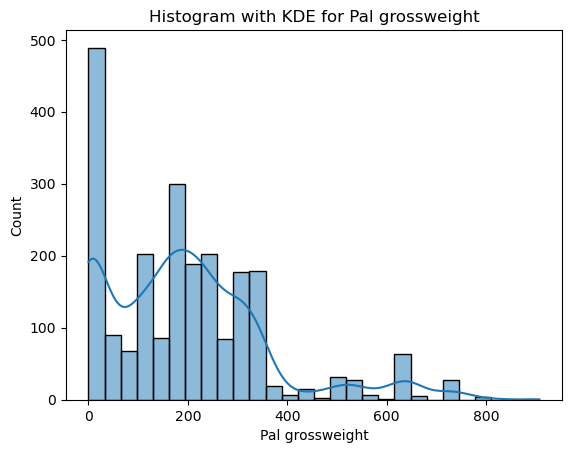

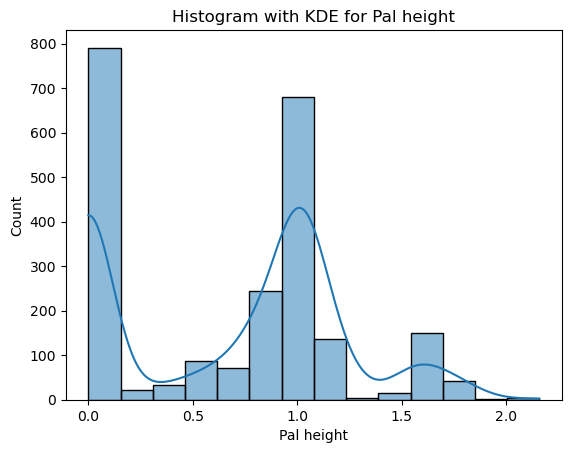

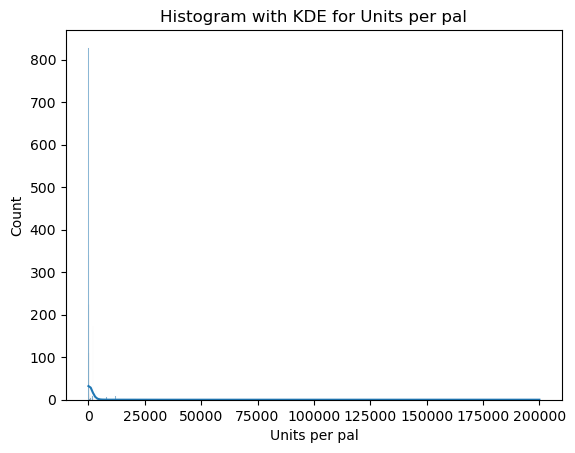

In [50]:
for column in Stock_keeping_Data.select_dtypes(include=[np.number]).columns:
    if column != 'ID':  # Excluding the 'skuID' column
        sns.histplot(Stock_keeping_Data[column], kde=True)
        plt.title(f'Histogram with KDE for {column}')
        plt.show()



In [51]:
# removing outliers for both the 'Outbound number' and 'Total outbound' columns 
Q1_outbound = Stock_keeping_Data['Outbound number'].quantile(0.25)
Q3_outbound = Stock_keeping_Data['Outbound number'].quantile(0.75)
IQR_outbound = Q3_outbound - Q1_outbound

Q1_total_outbound = Stock_keeping_Data['Total outbound'].quantile(0.25)
Q3_total_outbound = Stock_keeping_Data['Total outbound'].quantile(0.75)
IQR_total_outbound = Q3_total_outbound - Q1_total_outbound

# Defining the bounds for the outliers for 'Outbound number'
lower_bound_outbound = Q1_outbound - 1.5 * IQR_outbound
upper_bound_outbound = Q3_outbound + 1.5 * IQR_outbound

# Defining the bounds for the outliers for 'total outbound'
lower_bound_total_outbound = Q1_total_outbound - 1.5 * IQR_total_outbound
upper_bound_total_outbound = Q3_total_outbound + 1.5 * IQR_total_outbound

# Filtering out the outliers
# Filtering out the outliers
Stock_keeping_Data_filtered = Stock_keeping_Data.loc[
    (Stock_keeping_Data['Outbound number'] >= lower_bound_outbound) &
    (Stock_keeping_Data['Outbound number'] <= upper_bound_outbound) &
    (Stock_keeping_Data['Total outbound'] >= lower_bound_total_outbound) &
    (Stock_keeping_Data['Total outbound'] <= upper_bound_total_outbound)
]
Stock_keeping_Data_filtered

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
1,2,0.954,547,0,0.0,207.68,1.00,384
2,3,2.385,547,12,23.0,165.78,1.02,108
3,4,5.100,547,0,0.0,221.04,1.05,72
4,5,0.000,547,0,0.0,0.00,0.00,0
5,6,1.110,547,1,1.0,207.68,1.00,384
...,...,...,...,...,...,...,...,...
2273,2274,0.000,0,0,0.0,2.70,0.00,10
2274,2275,0.000,0,0,0.0,2.70,0.00,10
2275,2276,0.000,0,1,1.0,9.58,0.00,1
2276,2277,0.000,0,0,0.0,38.36,0.00,4


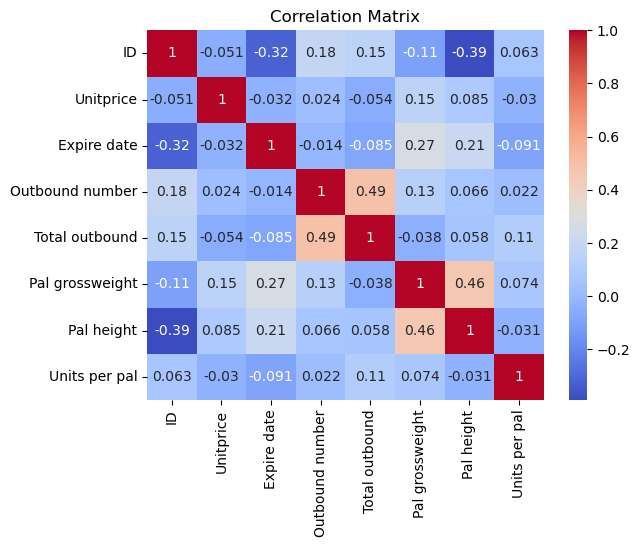

In [52]:
# Correlation analysis
correlation_matrix = Stock_keeping_Data_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [53]:
# Data Preprocessing
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Stock_keeping_Data_filtered)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

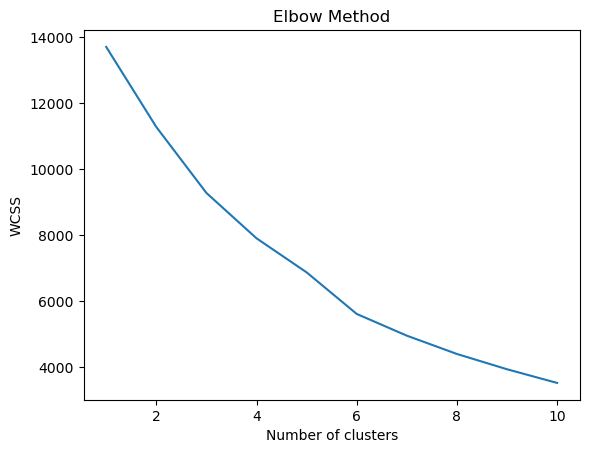

In [54]:
# Clustering Analysis
# Determining the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

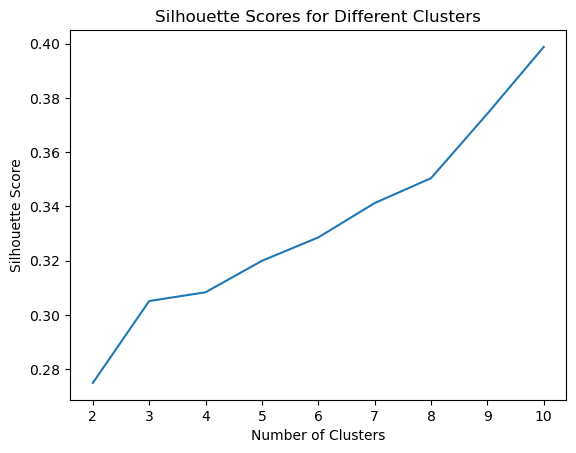

In [55]:
# Using Silhouette Score to determine the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, kmeans_labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title("Silhouette Scores for Different Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


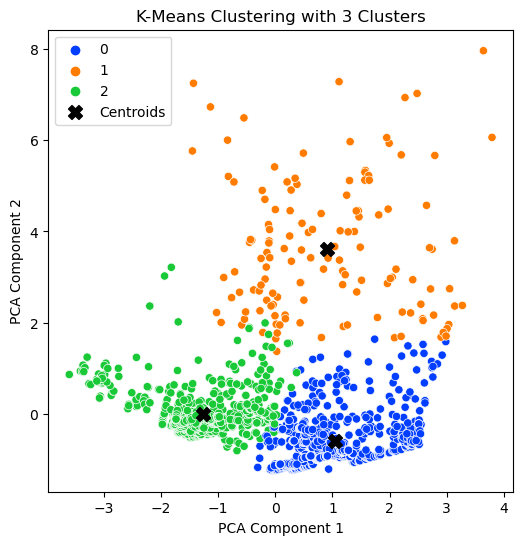

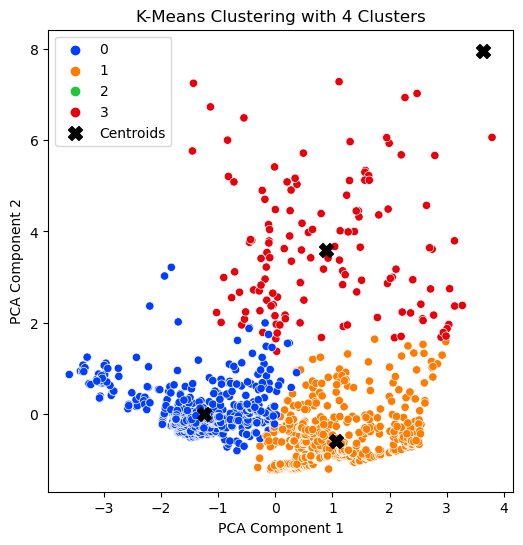

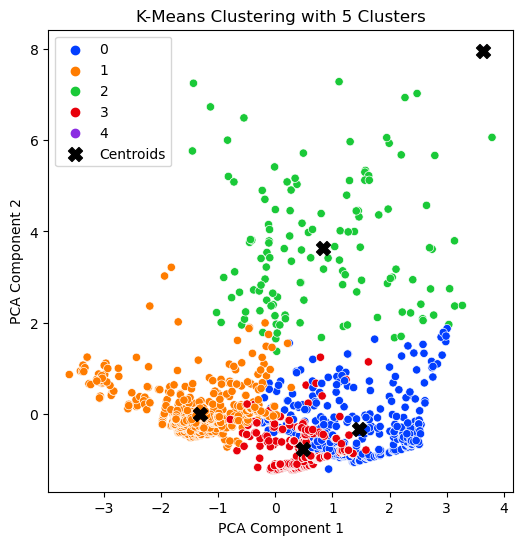

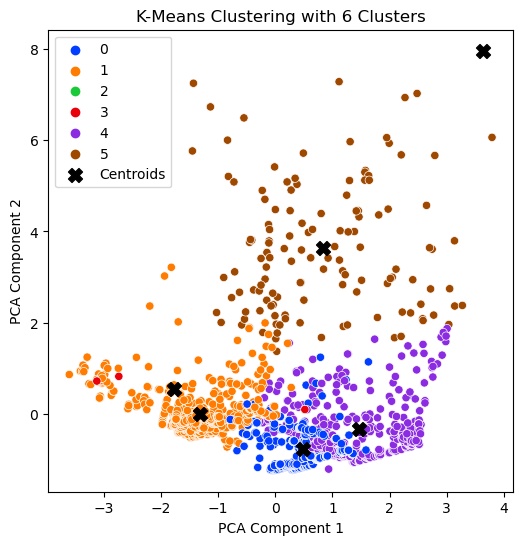

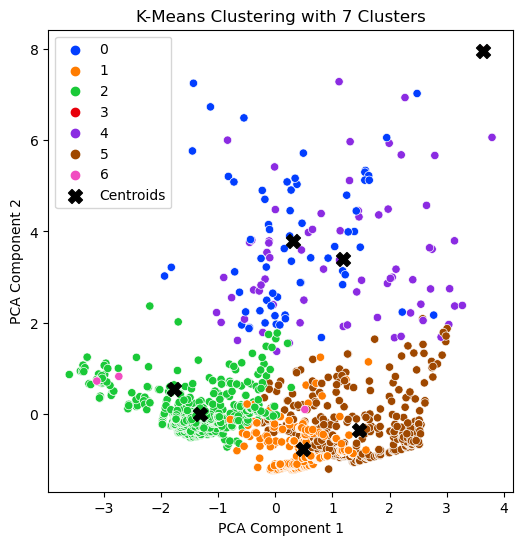

In [63]:

# Assuming 'scaled_data' is your pre-processed data
cluster_options = [3, 4, 5, 6, 7]  # You can modify this list as needed

for n_clusters in cluster_options:
    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)

    # Dimensionality Reduction using PCA for Visualization
    pca = PCA(n_components=2)
    data_reduced = pca.fit_transform(scaled_data)
    centroids_reduced = pca.transform(kmeans.cluster_centers_)

    # Preparing DataFrame for Seaborn
    reduced_df = pd.DataFrame(data_reduced, columns=['PCA1', 'PCA2'])
    reduced_df['Cluster'] = kmeans_labels

    # Visualizing the clusters
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=reduced_df, palette="bright")

    # Plot the centroids
    plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s=100, c='black', marker='X', label='Centroids')

    plt.title(f"K-Means Clustering with {n_clusters} Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()


In [57]:
from sklearn.metrics.pairwise import euclidean_distances

# Calculate Euclidean distance for each point to its cluster center
centroids = kmeans.cluster_centers_
distances = euclidean_distances(scaled_data, centroids)

print(distances)
    
# Assign each point to the distance from its cluster center
min_distances = distances.min(axis=1)
reduced_df['DistanceToCenter'] = min_distances


[[ 5.30828522  2.47981798  1.11357881 ...  5.21330575  3.33053212
  20.93857305]
 [ 4.68058477  2.55580225  1.34745868 ...  4.92436968  3.32992782
  20.86247787]
 [ 5.29639337  2.5722303   1.04044077 ...  5.24298473  3.39124832
  20.69552534]
 ...
 [ 5.54285587  2.75824045  3.98594293 ...  5.28152025  1.46139922
  20.82188898]
 [ 5.54636598  2.73369627  3.92280167 ...  5.28260641  1.43895686
  20.81693887]
 [ 5.51653549  2.74506946  3.95130739 ...  5.27004665  1.44467692
  20.81917406]]


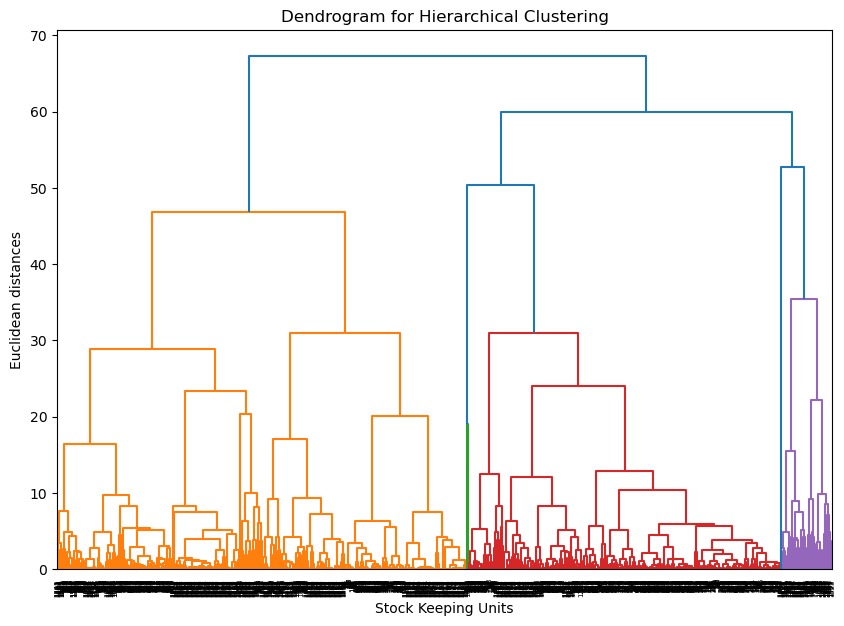

In [58]:
# Importing necessary libraries for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering
# Creating a Dendrogram to visualize the clustering process
plt.figure(figsize=(10, 7))
dendrogram(linkage(scaled_data, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Stock Keeping Units')
plt.ylabel('Euclidean distances')
plt.show()


In [59]:

# Selecting a number of clusters based on the dendrogram
chosen_clusters = 5  # Modify this based on the dendrogram analysis

# Performing Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=chosen_clusters, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_data)

hc_labels

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [60]:

# Dimensionality Reduction using PCA for Visualization
pca = PCA(n_components=2)
hc_data_reduced = pca.fit_transform(scaled_data)
hc_data_reduced

array([[-1.57498526, -0.46452084],
       [-1.40347039,  0.04583549],
       [-1.69970811, -0.41713614],
       ...,
       [ 2.50600007, -0.61939828],
       [ 2.42122086, -0.6150475 ],
       [ 2.46491332, -0.5926502 ]])

In [61]:


# Preparing DataFrame for Seaborn
hc_reduced_df = pd.DataFrame(hc_data_reduced, columns=['PCA1', 'PCA2'])
hc_reduced_df['Cluster'] = hc_labels

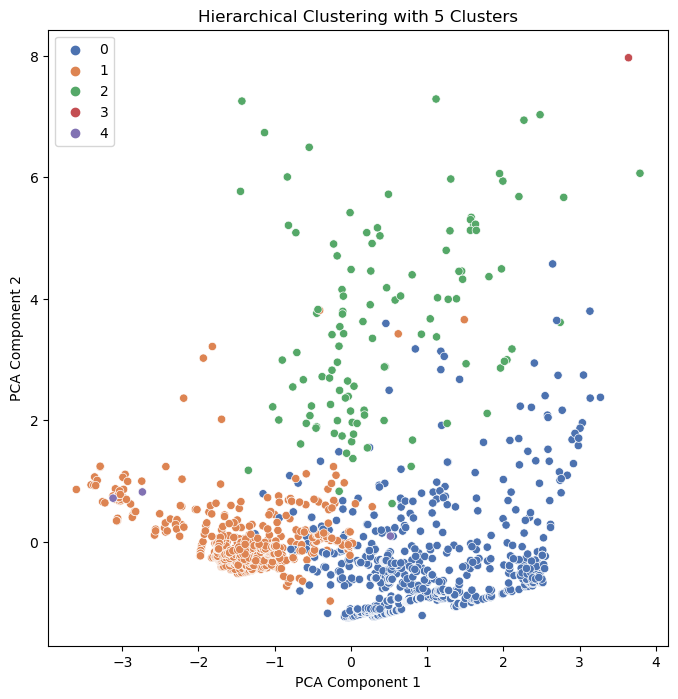

In [62]:
# Visualizing the Hierarchical Clusters
plt.figure(figsize=(8, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=hc_reduced_df, palette="deep")
plt.title(f"Hierarchical Clustering with {chosen_clusters} Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()
